In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from anomaly_intervals import *
from anomaly import *

In [2]:
from drift import Drift
from intervals import createDriftIntervals
ECG = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG805_data.out')
ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
max_length = 20000

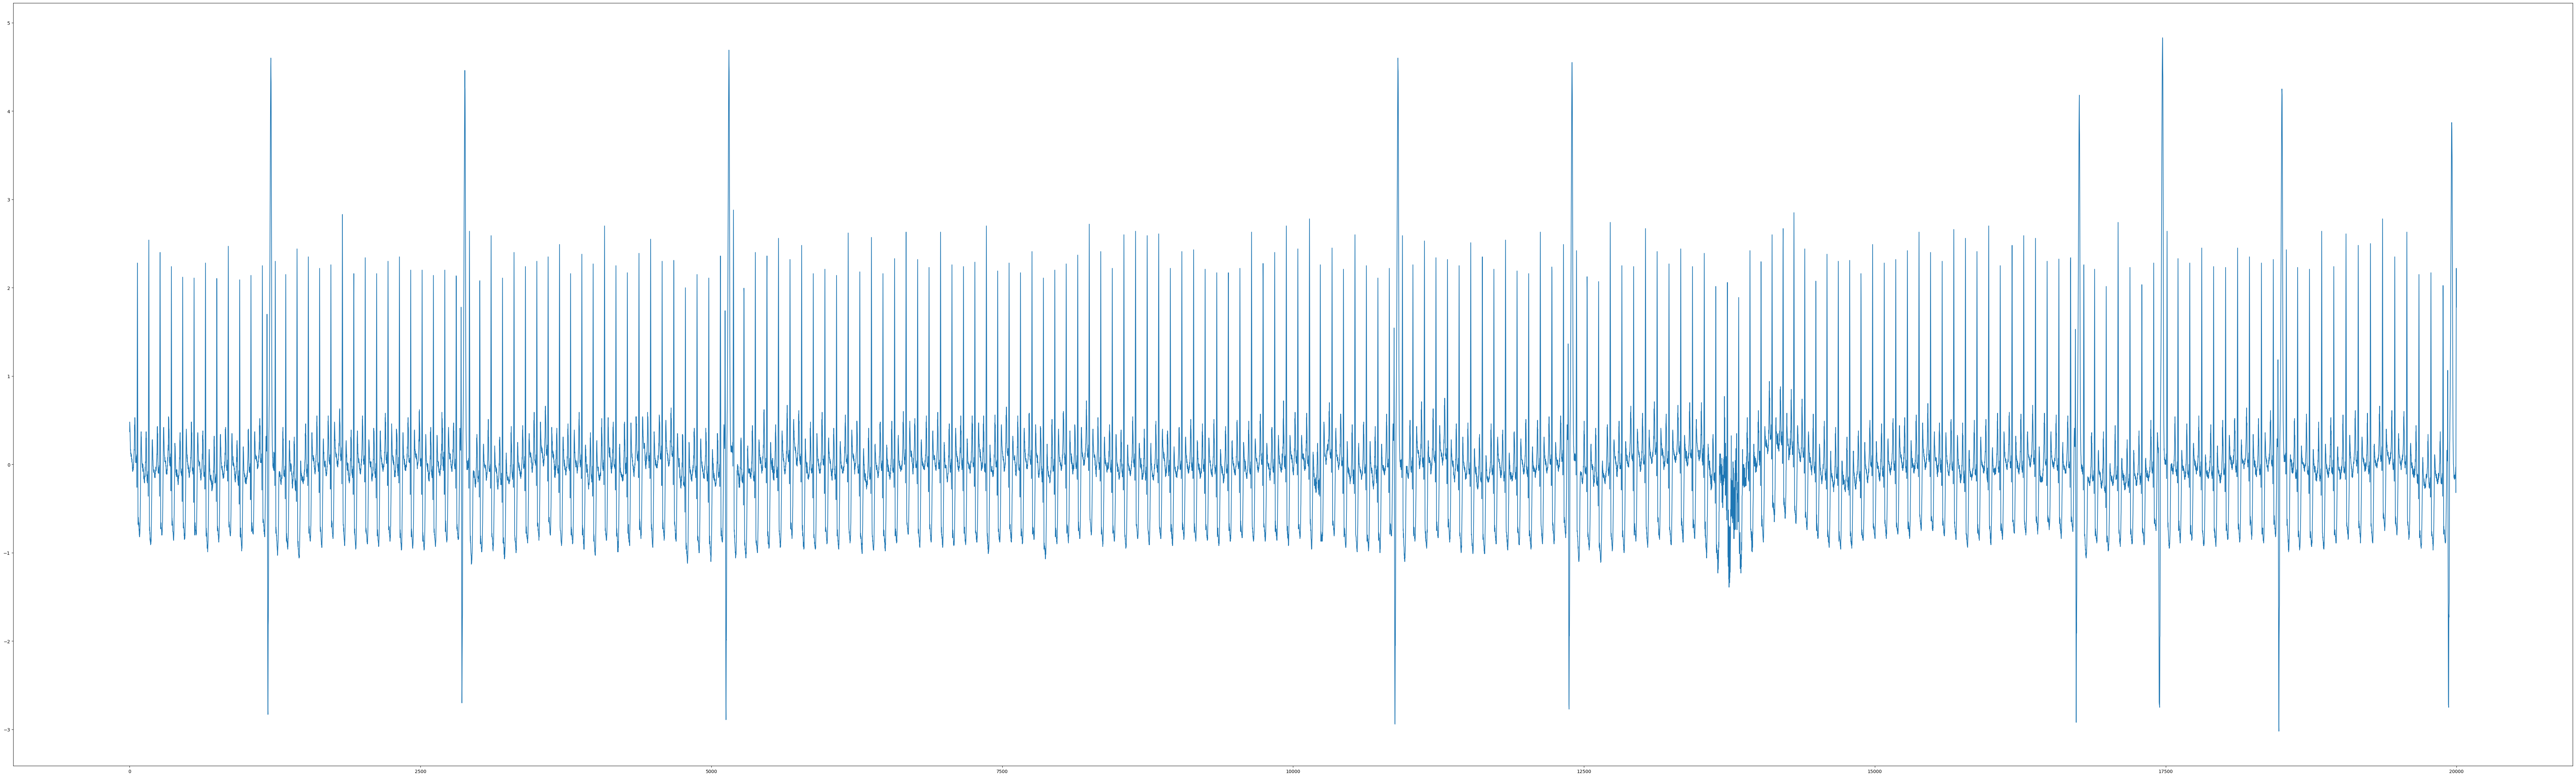

In [3]:
# plotting dataset 
drift_addition_1 = createDriftIntervals(ECG.iloc[0:max_length, :])

plt.figure(figsize=(100,30))
plt.plot(drift_addition_1.dataset.iloc[:,0])

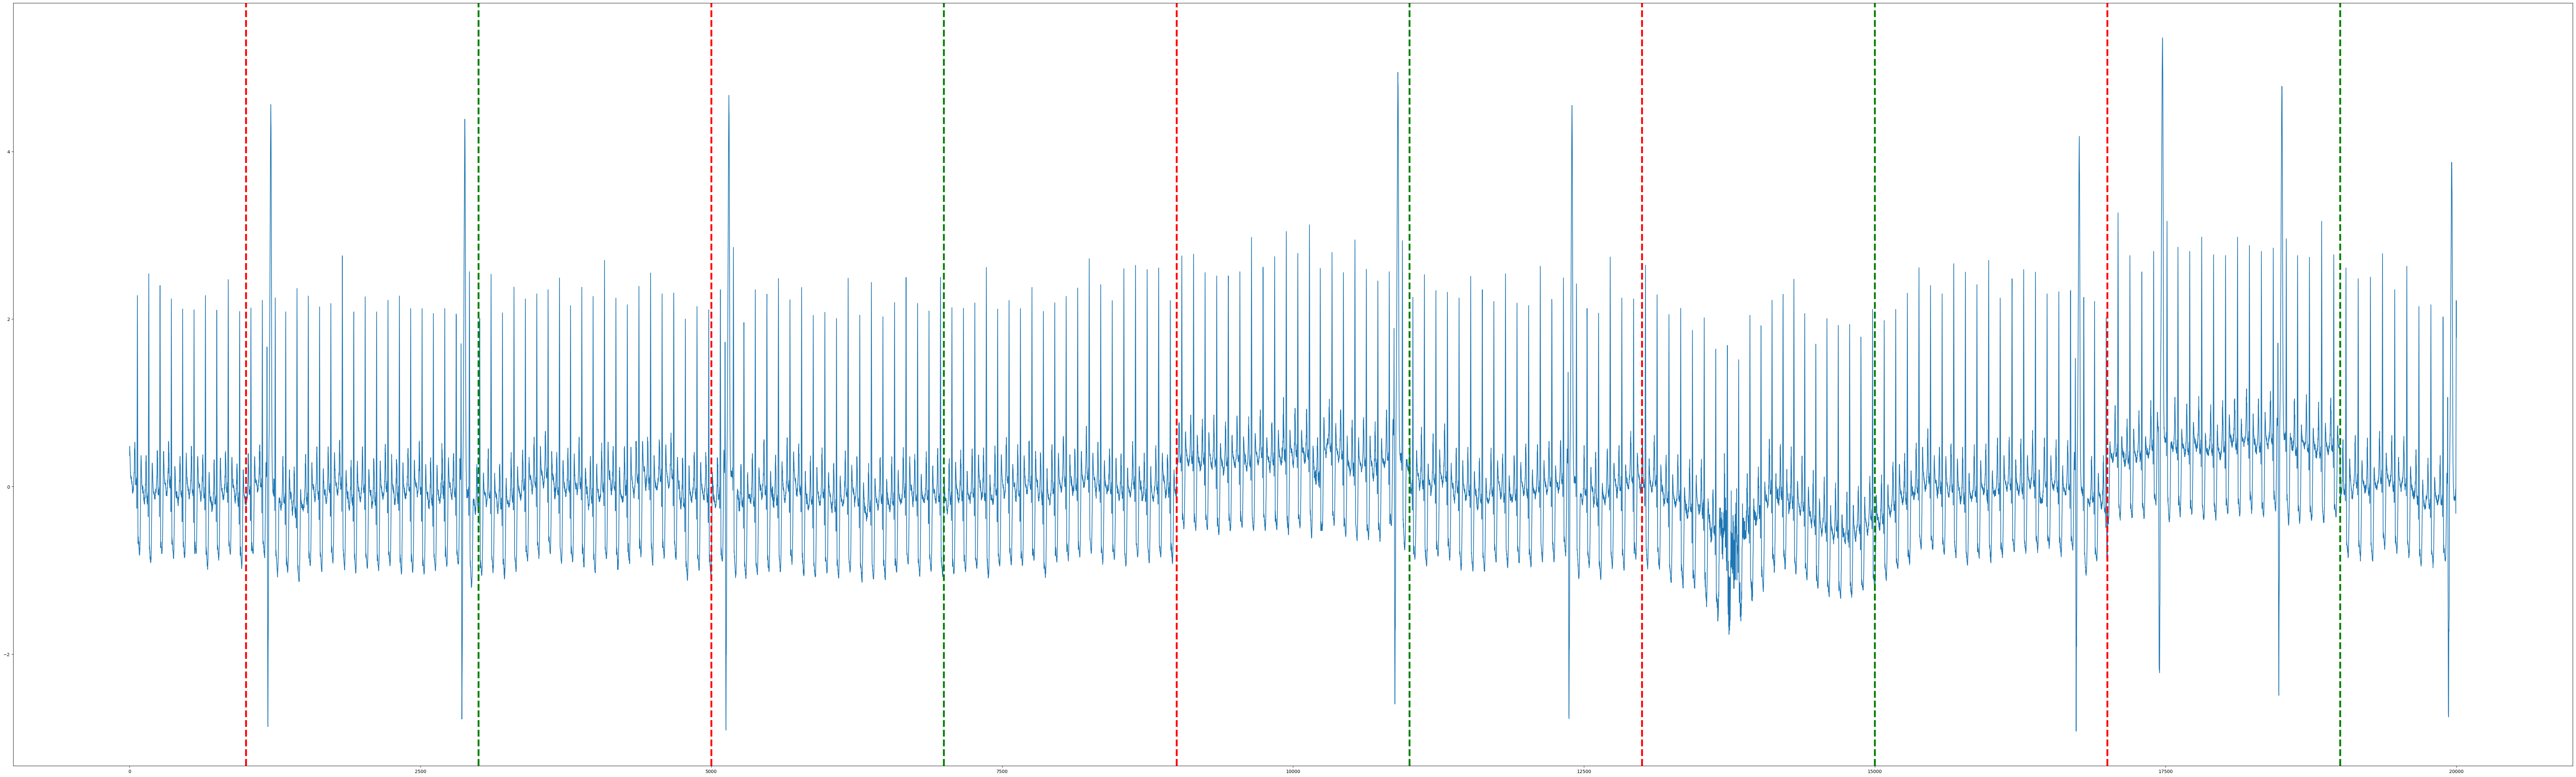

In [4]:
# creating 3 drift modules, one for each interval
meandrift1 = Drift('mean', 10, transition_period=0.2) # drift module 1
meandrift2 = Drift('mean', -13, transition_period=0) # drift module 3
meandrift3 = Drift('mean', 5, transition_period=0.5) # drift module 3

drift_addition_1.create_intervals(5,2000)
# add drift modules here corresponding to intervals
drift_addition_1.add_drifts(meandrift1, meandrift3, meandrift2, meandrift1, meandrift2) 

# plotting the dataset
drift_addition_1.plot_dataset()

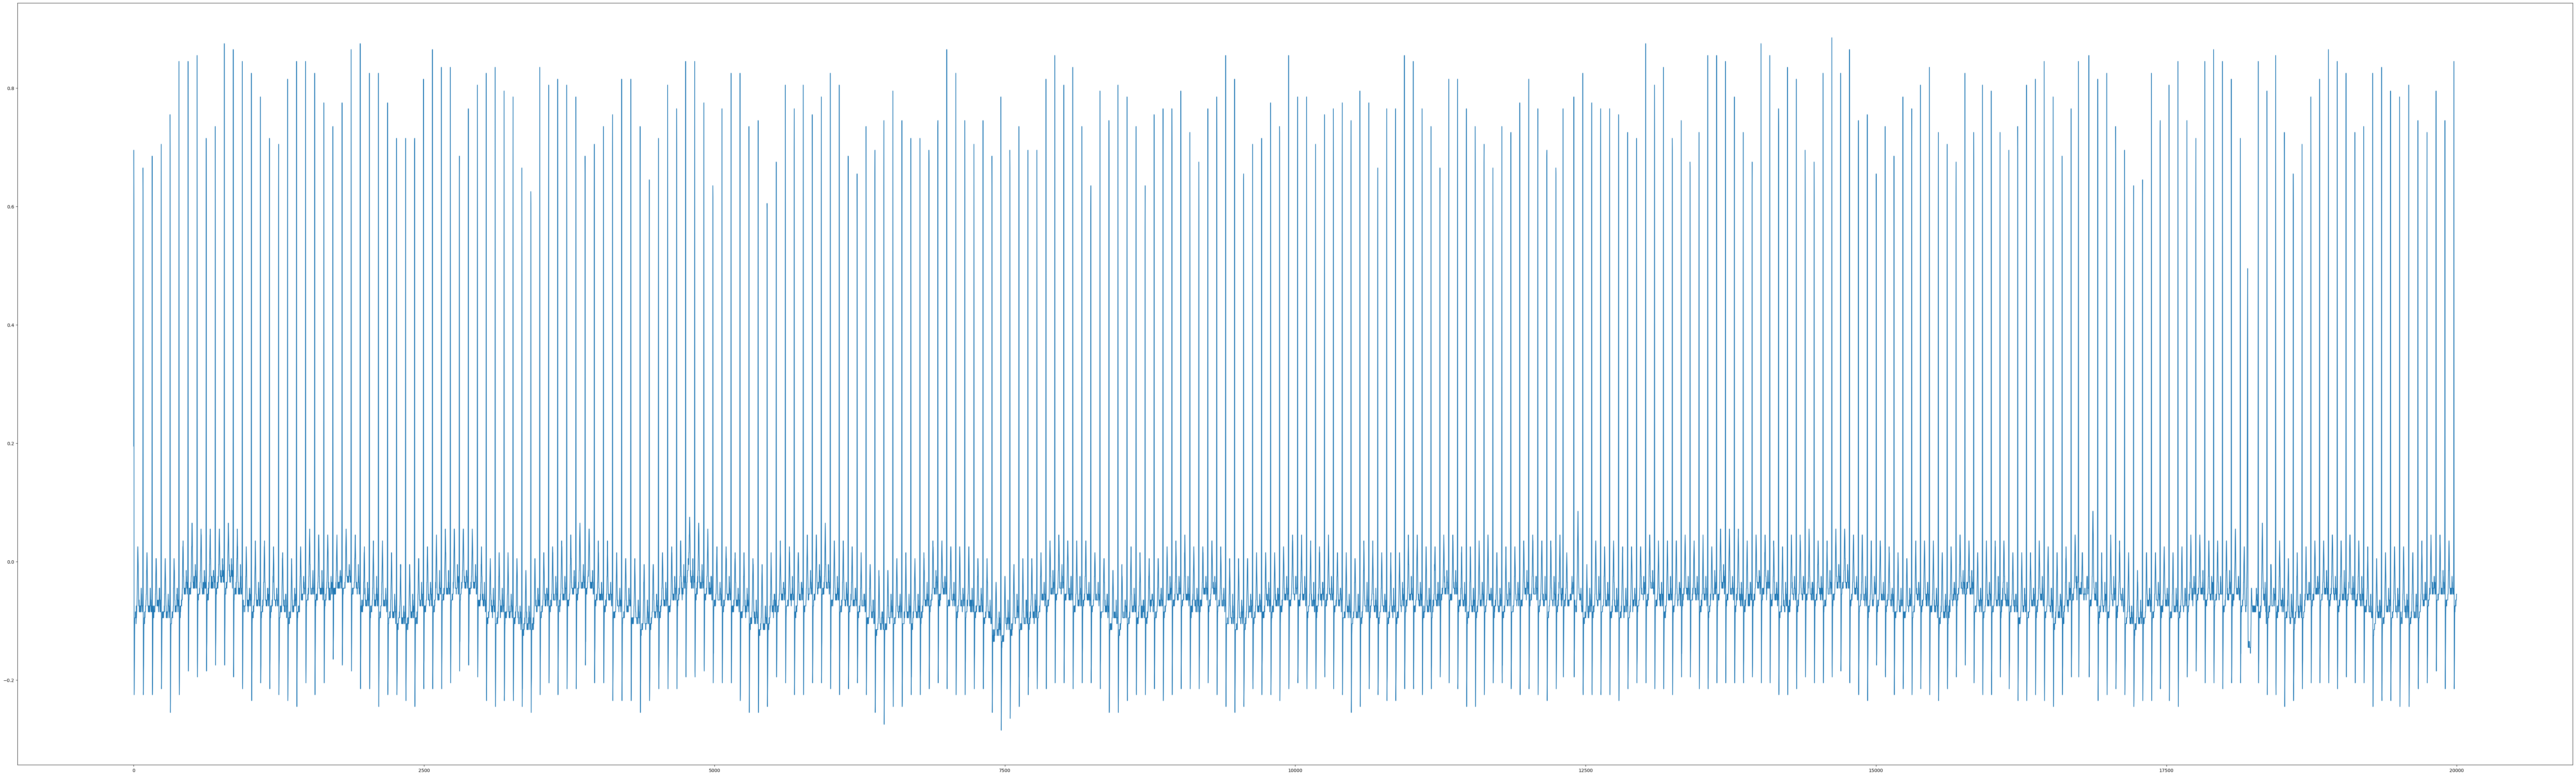

In [5]:
# plotting second dataset

anomaly_addition_1 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])

plt.figure(figsize=(100,30))
plt.plot(anomaly_addition_1.dataset.iloc[:,0])

In [6]:
# creating point anomaly module with uniform distribution of values
pDistAnom1 = DistPointAnomaly(0.02, 'uniform', num_values=100, lowerbound=-1, upperbound=1) 
# change the values to be unique 
# make option to change the existing dataset rather than replace the values (use the existing dataset)
# synthetically inject correlates errors (failure occured)
# creating point anomaly module with gaussian distribution of values
pDistAnom2 = DistPointAnomaly(0.003, distribution='gaussian', mu=0.7, std=0.9, num_values=20)
# creating point anomaly module with skew distribution of values
pDistAnom3 = DistPointAnomaly(0.01, 'skew', upperbound=2, skew=0.1)


# HOW THE ANOMALY SI DISTRUBUTE IN THE INTERVAL (GAUSSIAN, NORMAL)
# can remove if its too confusing

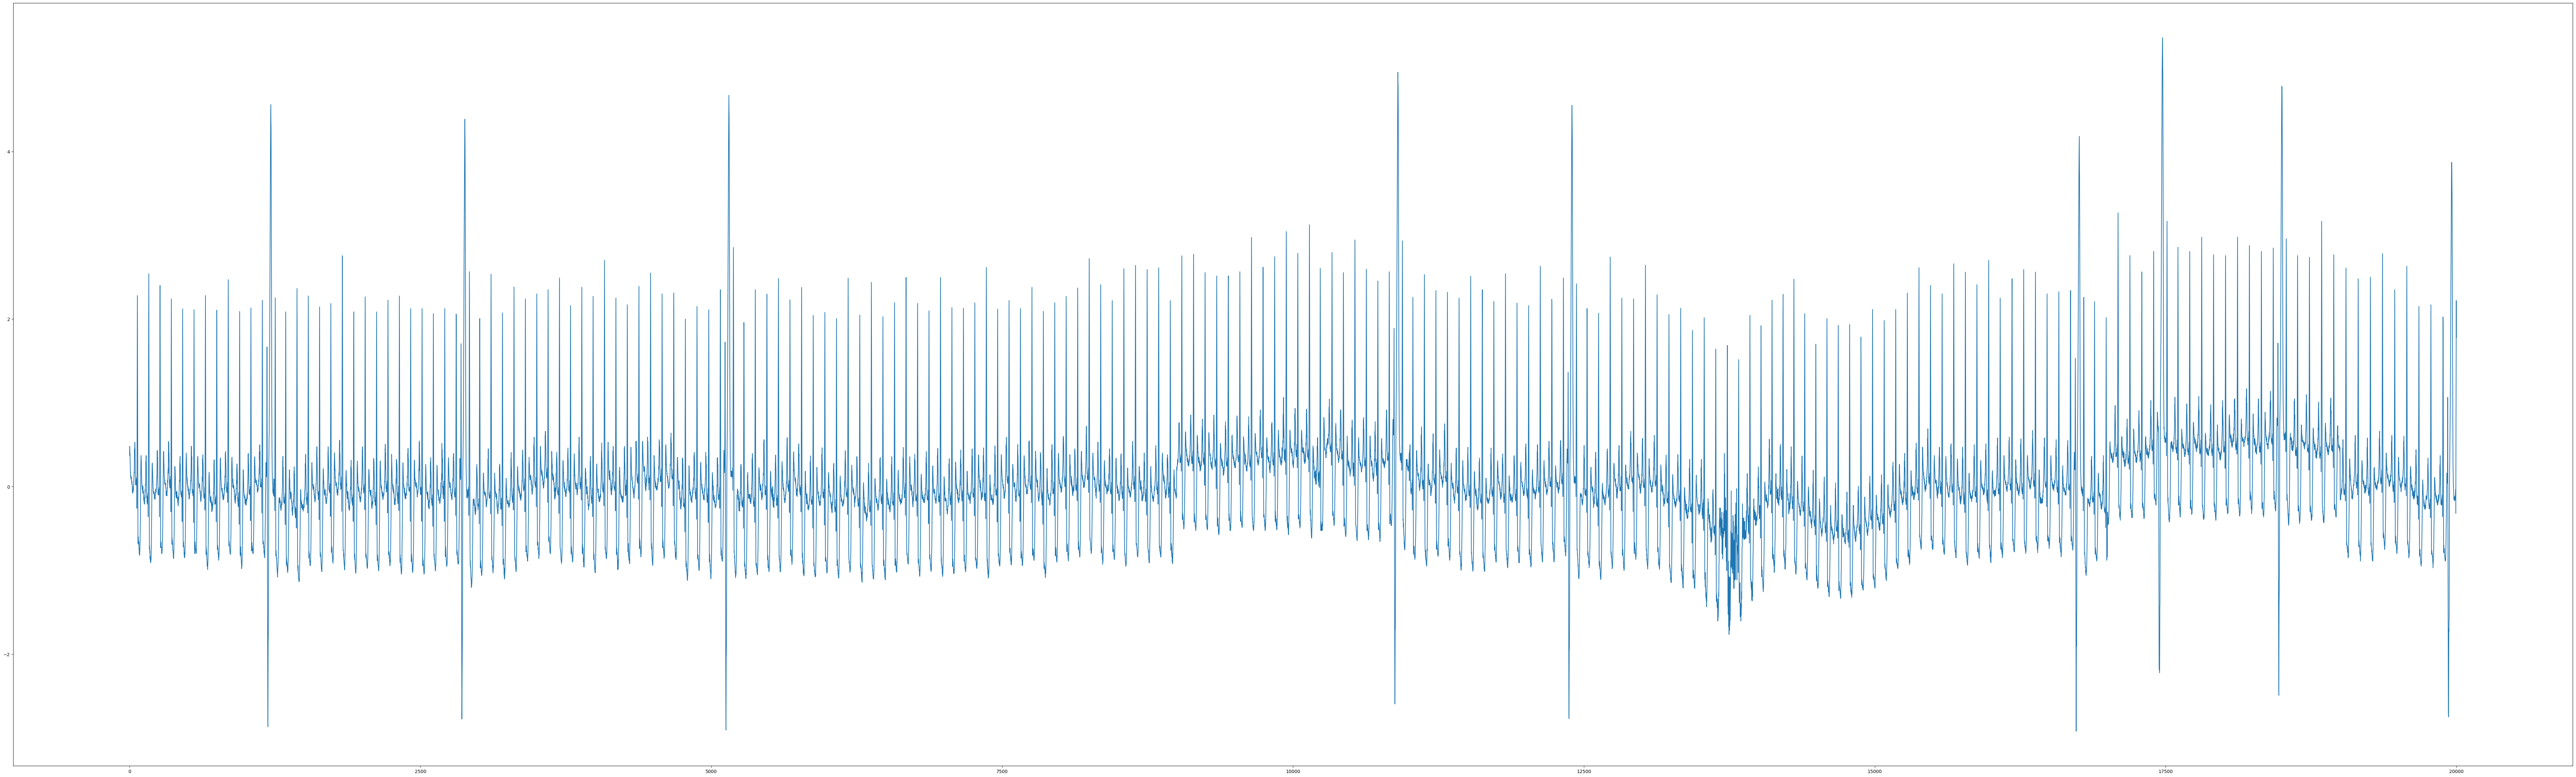

In [7]:
anomaly_addition_2 = createAnomalyIntervals(drift_addition_1.dataset)

plt.figure(figsize=(100,30))
plt.plot(anomaly_addition_2.dataset.iloc[:,0])



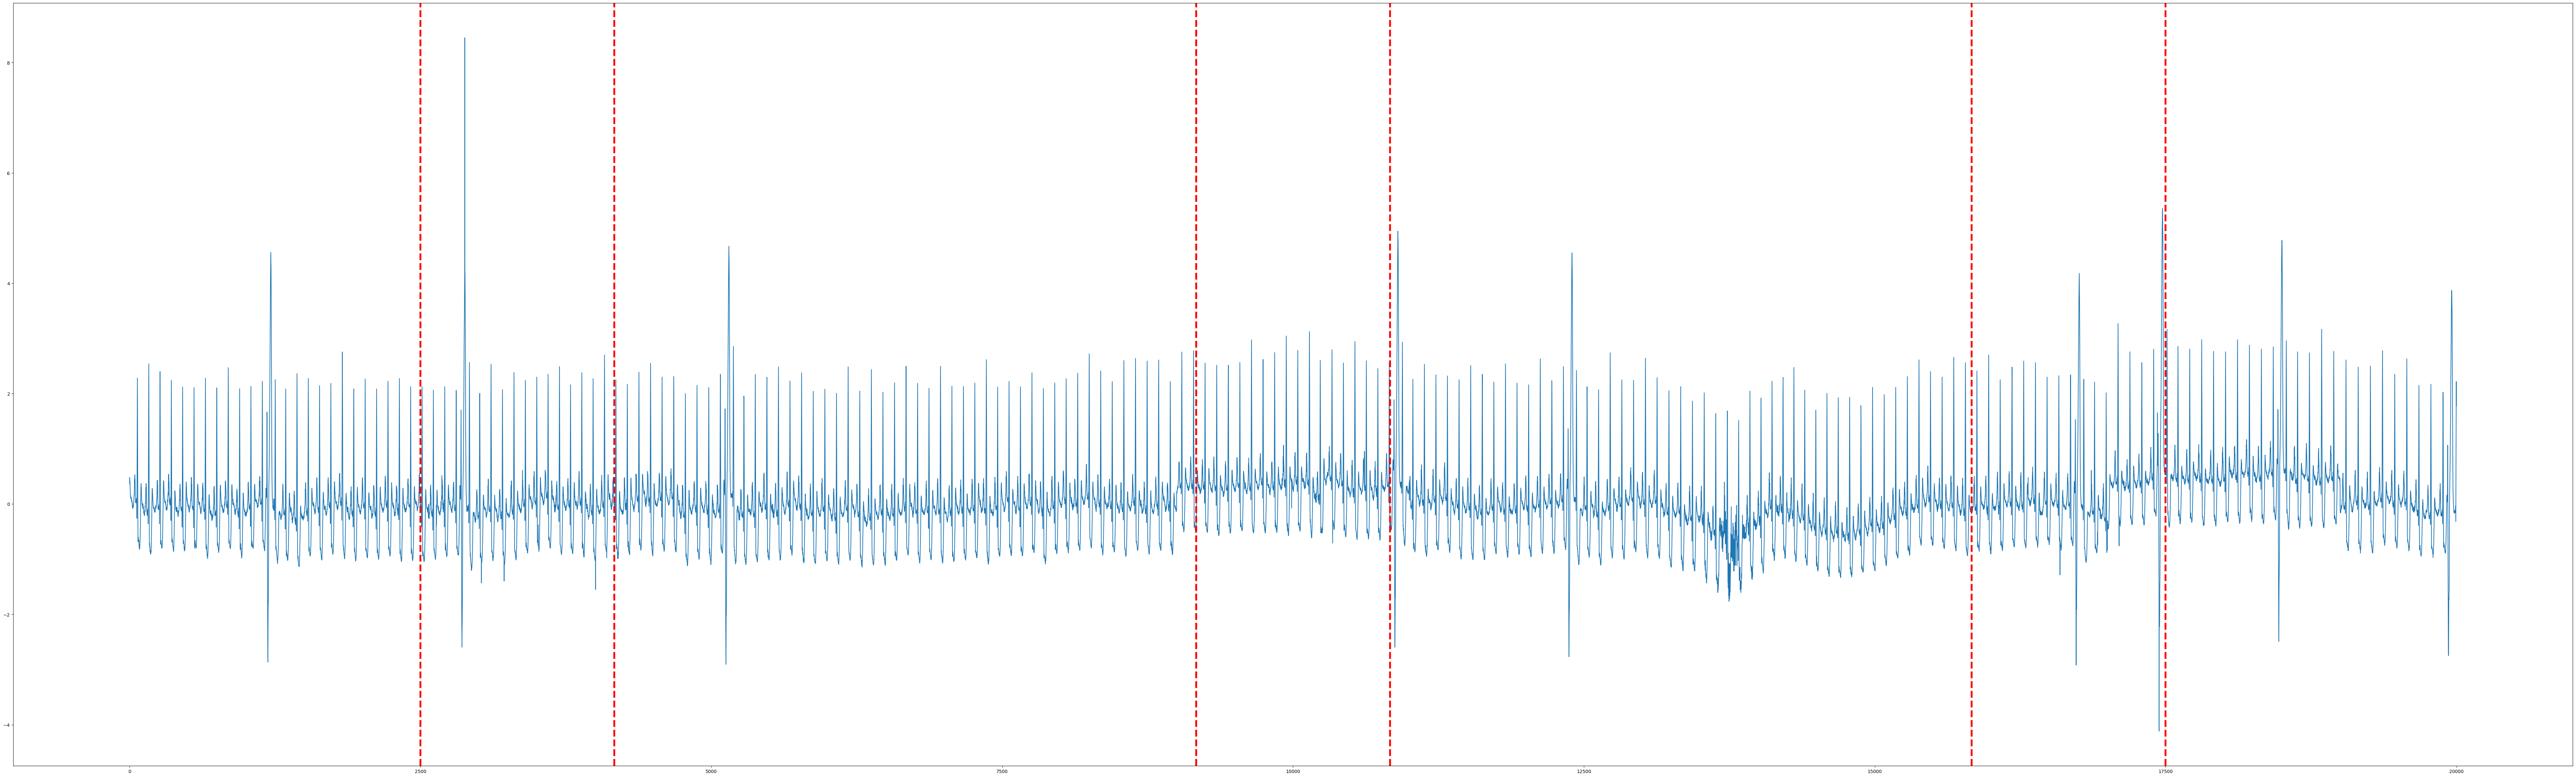

In [8]:
anomaly_addition_2.create_intervals(3,5000)
# add drift modules here corresponding to intervals
anomaly_addition_2.add_anomalies(pDistAnom1, pDistAnom2, pDistAnom3)

anomaly_addition_2.plot_dataset()

number of anomalies
6
number of anomalies
4
number of anomalies
1


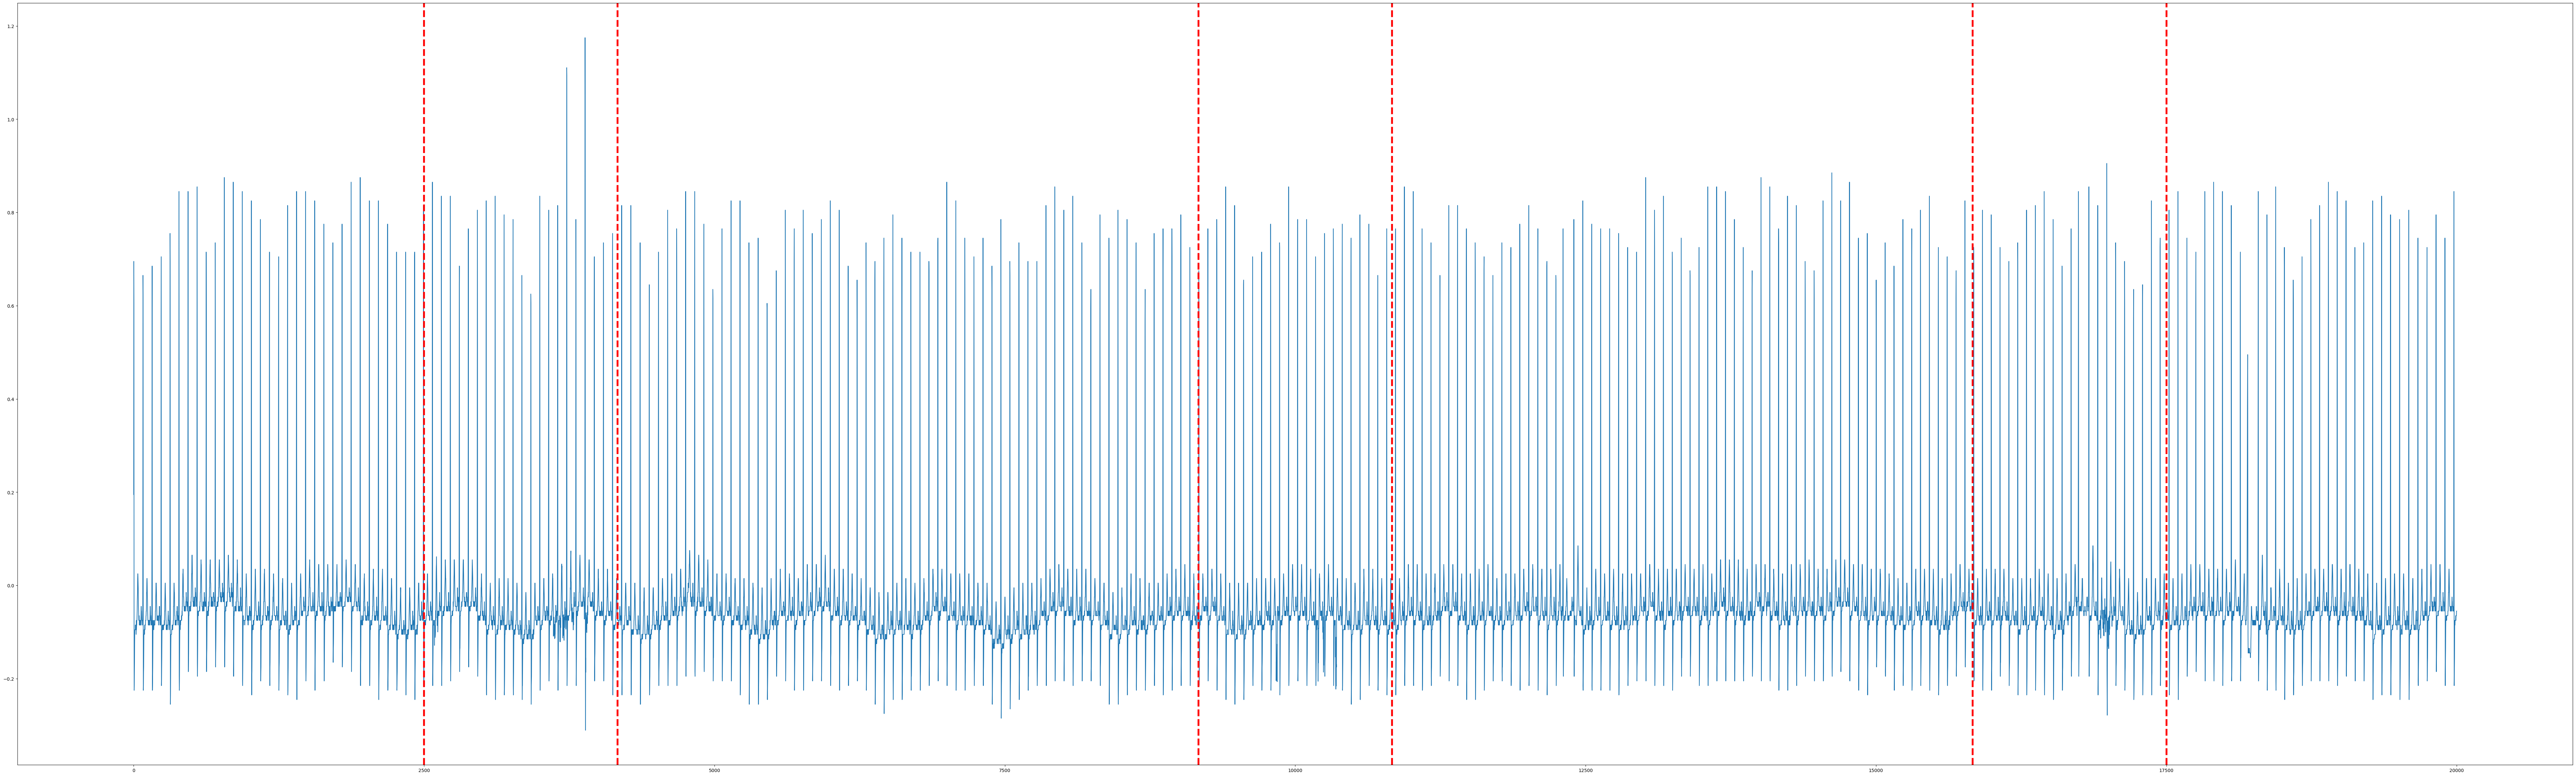

In [9]:
ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
anomaly_addition_3 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])

# creating point anomaly module with uniform distribution of values
pCollAnom1 = CollectiveAnomaly(30, 0.1, upperbound=0.9, lowerbound=0, num_values=50)
# creating point anomaly module with gaussian distribution of values
pCollAnom2 = CollectiveAnomaly(10, 0.02, upperbound=2, lowerbound=0.5, num_values=200)
# creating point anomaly module with skew distribution of values
pCollAnom3 = CollectiveAnomaly(100, 0.05, num_values=50, distribution='gaussian', mu=0.1, std=0.2)
#correlation step (going down at an incremental factor) - linear if percentage of added noise exceeds bound, keep at bound
# vary the length of anomalies (bound would be range of additive)
anomaly_addition_3.create_intervals(3,5000)
# add drift modules here corresponding to intervals
anomaly_addition_3.add_anomalies(pCollAnom1, pCollAnom2, pCollAnom3)

anomaly_addition_3.plot_dataset()


# IMPLEMENT BY ADDING NOISE TO EACH SEQUENCE

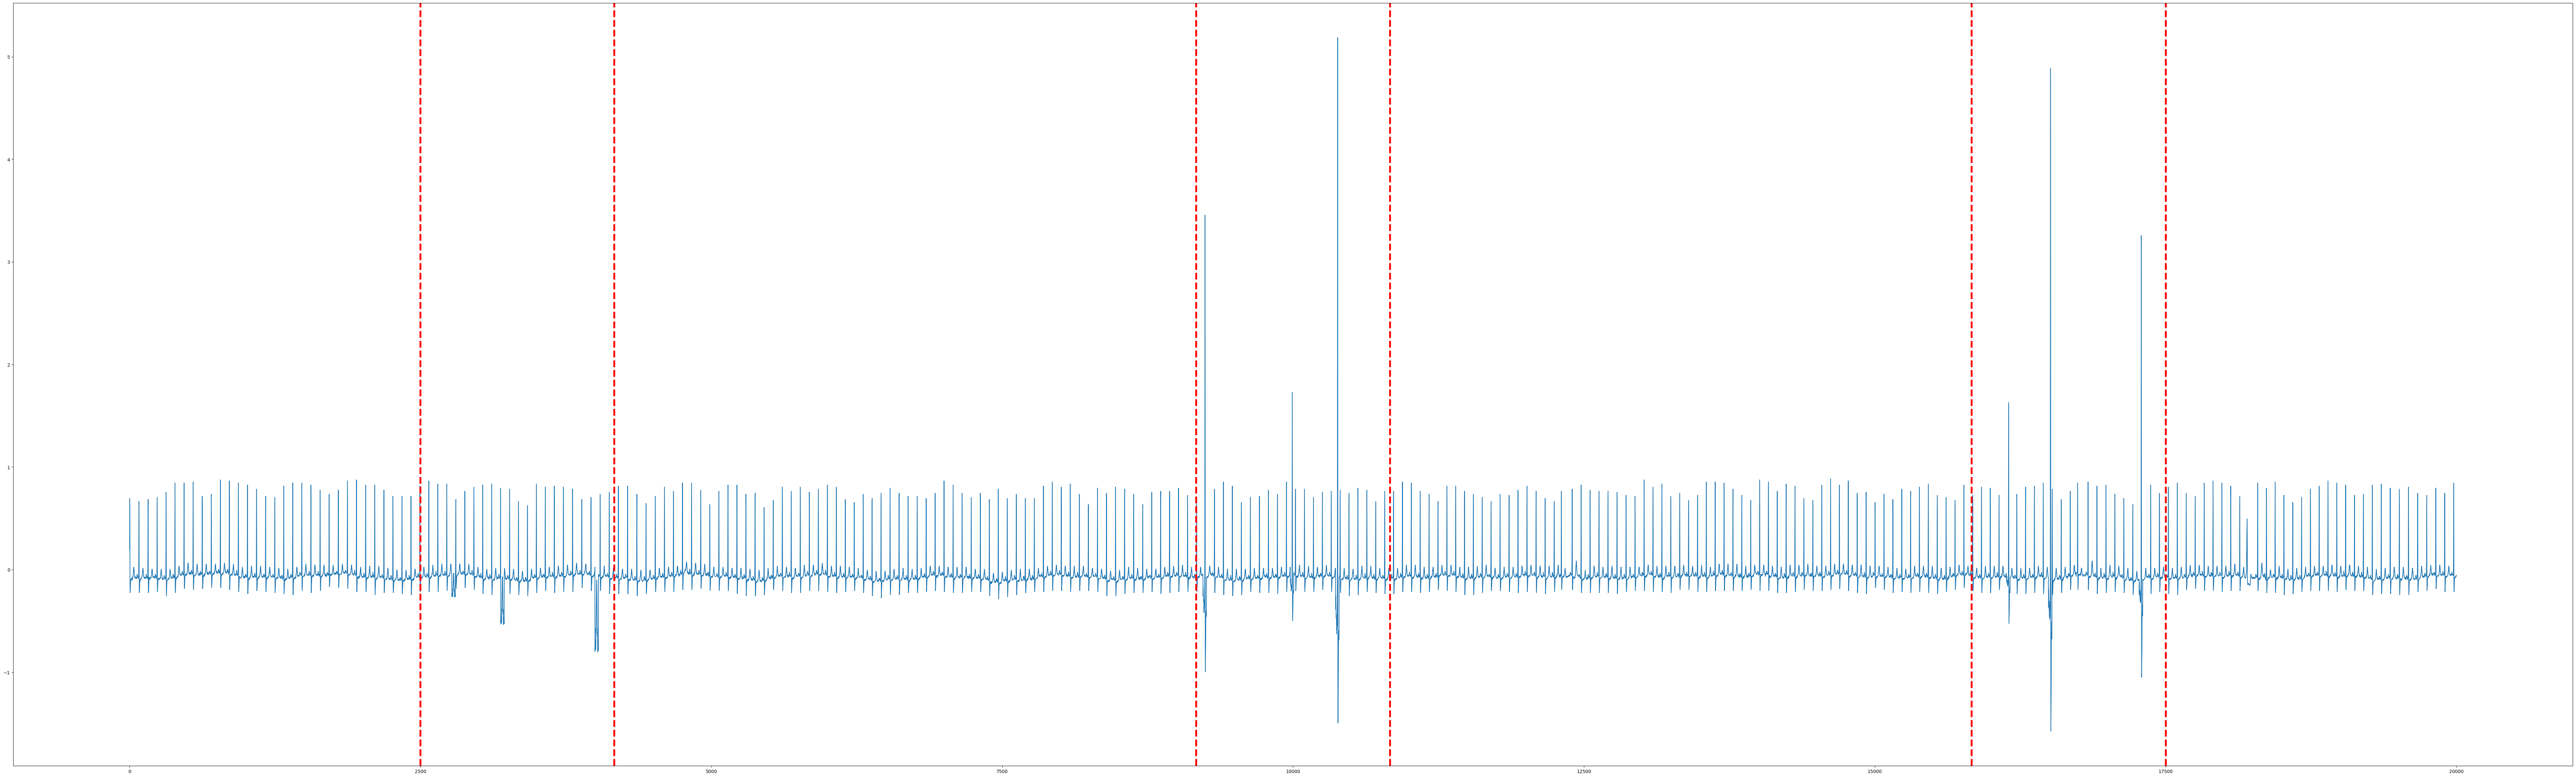

In [10]:
ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
anomaly_addition_5 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])


pCorrAnom1 = CorrelationAnomaly(0.05, 0.1, 0.25, 2, 14, 2, 30)

pCorrAnom2 = CorrelationAnomaly(0.05, 0.1, 0.25, 2, 14, 2, 30)

pCorrAnom3 = CorrelationAnomaly(0.05, 0.1, 0.25, 2, 14, 2, 30)

anomaly_addition_5.create_intervals(3,5000)

anomaly_addition_5.add_anomalies(pCorrAnom1, pCorrAnom2, pCorrAnom3)

anomaly_addition_5.plot_dataset()

In [11]:
# ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
# anomaly_addition_4 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])
# anomaly_addition_4.create_intervals(3,5000)
# # creating sequential anomalies
# pSeqAnom1 = SequentialAnomaly(0.01, 0, length=15)

# pSeqAnom2 = SequentialAnomaly(0.05, 0, length=30)

# pSeqAnom3 = SequentialAnomaly(0.10, 0, length=50)

# # add drift modules here corresponding to intervals
# anomaly_addition_4.add_anomalies(pSeqAnom1, pSeqAnom2, pSeqAnom3)

# anomaly_addition_4.plot_dataset()